# Chapter 57: Principal Component Analysis

### This code generates figures 3, 4, 5, and 6 in Chapter 57: Principal Component Analysis  (vol. III)


#### Runs simulations for Examples 2, 3 and 4 in the chapter


TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.


<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs.  The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Saba Nasiri. 

required libraries:

1. numpy
2. matplotlib.pyplot
3. mpl_toolkits.mplot3d
4. scipy.io


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy.io


## Example 57.2 (Reducing the feature space to two dimensions)

We illustrate PCA by generating $N=100$ random features $h_n\in R^{3}$ and reducing them to two-dimensional vectors. The top row in Fig. 57.3 shows a three-dimensional scatter diagram of the data (on the left). Although the label information is unnecessary, the plot shows the two classes in color for convenience. The plot on the right shows the recovered feature vectors, $\widehat{h}_n\in R^{3}$, using relation (57.33). The bottom row shows the reduced vectors, $h_{n}'\in R^{2}$, obtained after discarding the smallest eigenvalue, $\lambda_3$, and retaining the columns of $U$ corresponding to $\lambda_1$ and $\lambda_2$. For this example, the eigenvalues of $ R_p $ were found to be:

$$
\lambda_1=2.0098,\;\;\;\;\lambda_2=0.5458,\;\;\;\;\lambda_3=0.4444 \tag{57.42}
$$

It is clear from these values that we could have ignored the last two eigenvalues and retained only the first column of $U$ corresponding to $\lambda_1$; that is, we could have projected down to a subspace of dimension 1 without considerable loss in information relative to the two-dimensional case. This situation is evident from examining the projected data in the bottom row of Fig. 57.3; observe that the data is well discriminated if we simply consider their $x-$ coordinates.


In [34]:
scale_variance = 1 # set it to zero if we don't want to scale the variance

M = 3
N = 100
lambda1 = np.array([np.random.rand(), 10*(np.random.rand()+0.5), 20*(np.random.rand()+0.5)])

H1 = np.matmul(np.sqrt(np.diag(lambda1)),(np.random.randn(int(M),int(N/2))-np.random.rand(M,1)*np.ones((1, int(N/2)))))
g1 = np.ones((int(N/2)))
H2 = np.matmul(np.sqrt(np.diag(lambda1)),(np.random.randn(int(M),int(N/2))+2*np.random.rand(M,1)*np.ones((1, int(N/2)))))
g2 = -np.ones((int(N/2)))

Hx = np.concatenate([H1, H2], axis = 1)
gx = np.concatenate([g1, g2])

H = np.zeros((M, N))
g = np.zeros((N,))

P = np.random.permutation(N)

for n in range(N):
    H[:, n] = Hx[:, P[n]] # columns are feature vectors  
    g[n] = gx[P[n]] # classes
    

# Data pre-processing

bar_h = np.mean(H, axis = 1) # mean vector; Mx1
Hc = H - np.matmul(bar_h.reshape(-1, 1), np.ones((1, N))) # centering

D = np.eye(M, M)
if scale_variance == 1:
    for k in range(M):
        D[k, k] = np.std(Hc[k, :]) # square-root of variance; standard-deviation
        
Hp = np.matmul(np.linalg.inv(D), Hc) # variance normalization

# Dimensionality reduction

Rh_hat = np.zeros((M, M))
for n in range(N):
    Rh_hat = Rh_hat + np.matmul(Hp[:, n].reshape(1, -1).T, Hp[:, n].reshape(1, -1))
    
Rh_hat = Rh_hat/(N-1)

Lambda, Ux = np.linalg.eig(Rh_hat)
l_vec = Lambda
l_vec_sort = np.sort(l_vec)[::-1] # order eigenvalues from largest to lowest
idx = np.argsort(l_vec)[::-1]

U = np.zeros((M, M))
for m in range(M): # order the columns of U similarly
    U[:, m] = Ux[:, idx[m]]
    
U1 = U[0:M, 0:M-1] # reduced by one dimension; keep only first M-1 columns
Hprime = np.matmul(U1.T, Hp)

Rh_test = np.zeros((M-1, M-1)) # this calculation is just a check to see if we get the reduced lambda
for n in range(N):
    Rh_test = Rh_test + np.matmul(Hprime[:, n].reshape(2, -1), Hprime[:, n].reshape(2, -1).T)
    

xg = np.array([])
yg = np.array([])
xr = np.array([])
yr = np.array([])

for n in range(N): # for plotting data;
    if g[n] == 1:
        xg = np.append(xg, Hprime[0, n]) # x-coordinate
        yg = np.append(yg, Hprime[1, n]) # y-coordinate
    
    else:
        xr = np.append(xr, Hprime[0, n]) # x-coordinate
        yr = np.append(yr, Hprime[1, n]) # y-coordinate


        
xg3 = np.array([])
yg3 = np.array([])
zg3 = np.array([])
xr3 = np.array([])
yr3 = np.array([])
zr3 = np.array([])

for n in range(N): # for 3-D plot of original data
    if g[n] == 1:
        xg3 = np.append(xg3, H[0, n]) # x-coordinate
        yg3 = np.append(yg3, H[1, n]) # y-coordinate
        zg3 = np.append(zg3, H[2, n]) # z-coordinate
    else:
        xr3 = np.append(xr3, H[0, n]) # x-coordinate
        yr3 = np.append(yr3, H[1, n]) # y-coordinate
        zr3 = np.append(zr3, H[2, n]) # z-coordinate
        
        
        
xg3p = np.array([])
yg3p = np.array([])
zg3p = np.array([])
xr3p = np.array([])
yr3p = np.array([])
zr3p = np.array([])

for n in range(N): # for 3-D plot of centered and normalized data
    if g[n] == 1:
        xg3p = np.append(xg3p, Hp[0, n]) # x-coordinate
        yg3p = np.append(yg3p, Hp[1, n]) # y-coordinate
        zg3p = np.append(zg3p, Hp[2, n]) # z-coordinate
    else:
        xr3p = np.append(xr3p, Hp[0, n]) # x-coordinate
        yr3p = np.append(yr3p, Hp[1, n]) # y-coordinate
        zr3p = np.append(zr3p, Hp[2, n]) # z-coordinate
        

# approximating original data from projections
Hhat = np.matmul(bar_h.reshape(1, -1).T, np.ones((1, N))) + np.matmul(np.matmul(D, U1), Hprime)

xg3hat = np.array([])
yg3hat = np.array([])
zg3hat = np.array([])
xr3hat = np.array([])
yr3hat = np.array([])
zr3hat = np.array([])

for n in range(N): # for 3-D plot of original data
    if g[n] == 1:
        xg3hat = np.append(xg3hat, Hhat[0, n]) # x-coordinate
        yg3hat = np.append(yg3hat, Hhat[1, n]) # y-coordinate
        zg3hat = np.append(zg3hat, Hhat[2, n]) # z-coordinate
    else:
        xr3hat = np.append(xr3hat, Hhat[0, n]) # x-coordinate
        yr3hat = np.append(yr3hat, Hhat[1, n]) # y-coordinate
        zr3hat = np.append(zr3hat, Hhat[2, n]) # z-coordinate
        
        
k = 0
xp = np.zeros((np.arange(-2.5, 2.6, 0.1).shape[0]*np.arange(-2.5, 2.6, 0.1).shape[0],))
yp = np.zeros((np.arange(-2.5, 2.6, 0.1).shape[0]*np.arange(-2.5, 2.6, 0.1).shape[0],))
zp = np.zeros((np.arange(-2.5, 2.6, 0.1).shape[0]*np.arange(-2.5, 2.6, 0.1).shape[0],))

for a in np.arange(-2.5, 2.6, 0.1): # plane on which projection is occuring, range space of the two columns of U1
    for b in np.arange(-2.5, 2.6, 0.1):
        r = np.matmul(U1, np.array([a, b]).reshape(-1, 1))
        xp[k] = r[0]
        yp[k] = r[1]
        zp[k] = r[2]
        k = k + 1


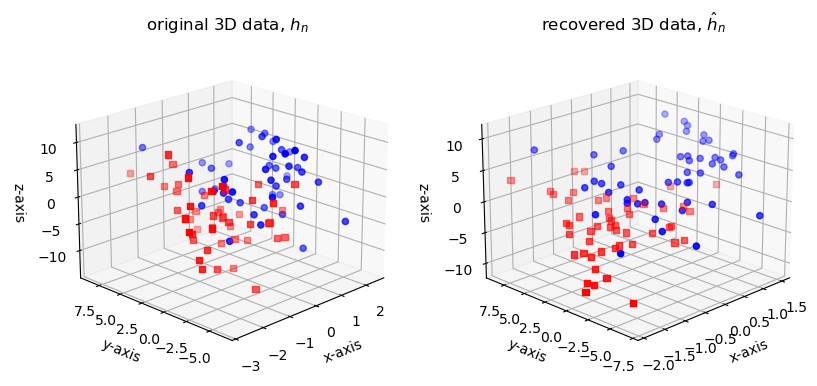

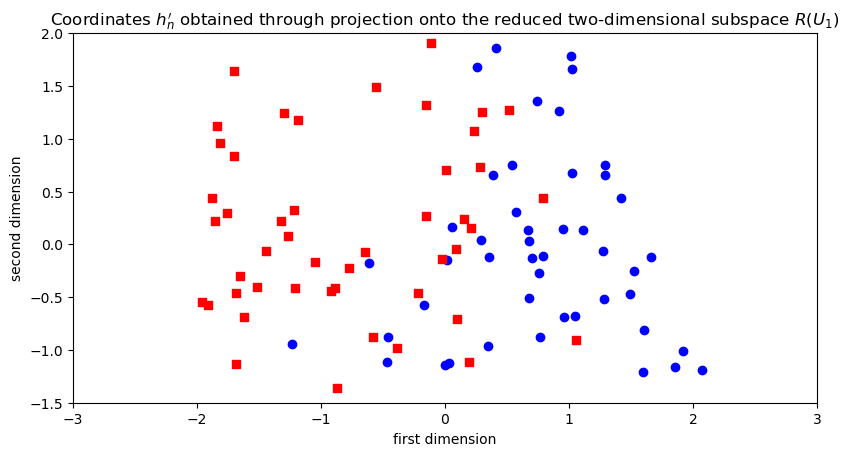

In [35]:
# figure 3 (scatter plots)

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xg3.reshape(1, -1), yg3.reshape(1, -1), zg3.reshape(1, -1), marker='s', c = 'red')
ax.scatter(xr3.reshape(1, -1), yr3.reshape(1, -1), zr3.reshape(1, -1), marker='o', c = 'blue')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('original 3D data, $h_n$')
ax.view_init(20, 225)


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xg3hat.reshape(1, -1), yg3hat.reshape(1, -1), zg3hat.reshape(1, -1), marker='s', c = 'red')
ax.scatter(xr3hat.reshape(1, -1), yr3hat.reshape(1, -1), zr3hat.reshape(1, -1), marker='o', c = 'blue')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('recovered 3D data, $\hat{h}_n$')
ax.view_init(20, 225)


fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xg.reshape(1, -1), yg.reshape(1, -1), marker='o', c = 'blue')
ax.scatter(xr.reshape(1, -1), yr.reshape(1, -1), marker='s', c = 'red')
ax.set_xlabel('first dimension')
ax.set_ylabel('second dimension')
ax.set_title('Coordinates $h_n\'$ obtained through projection onto the reduced two-dimensional subspace $R(U_1)$')
ax.set_xlim([-3, 3])
ax.set_ylim([-1.5, 2]);

#plt.savefig('fig 57.3.pdf')

**Figure 57.3** The plot in the top row ($left$) shows a three-dimensional scatter diagram of the original $N=100$ feature vectors. The plot in the same top row ($right$) shows the recovered feature vectors using approximation (57.33). The bottom row shows the reduced vectors $\{h_{n}'\}$ in two dimensions, which result from projecting the preprocessed vectors $\{h_{n,p}\}$ onto $R(U_1)$.

For illustration purposes, Fig. 57.4 shows a three-dimensional scatter diagram of the normalized feature vectors, $h_{n,p}\in R^3$, on the left. The plot on the right shows the same vectors $\{h_{n,p}\}$ along with the hyperplane corresponding to the column span of $U_1$. The vectors $\{h_{n,p}\}$ are projected onto this range space to generate the reduced vectors $\{h_n'\}$, already shown in the bottom row of Fig. 57.3.

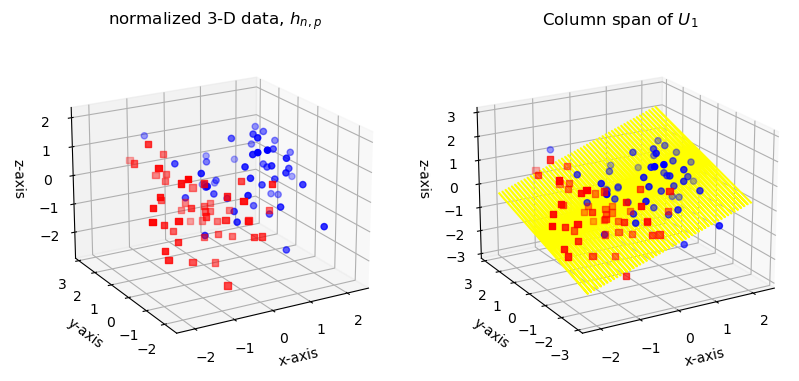

In [36]:
# figure 4 (scatter plots)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(xg3p.reshape(1, -1), yg3p.reshape(1, -1), zg3p.reshape(1, -1), marker='s', c = 'red')
ax.scatter(xr3p.reshape(1, -1), yr3p.reshape(1, -1), zr3p.reshape(1, -1), marker='o', c = 'blue')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('normalized 3-D data, $h_{n, p}$')
ax.view_init(20, 240)
#ax.set_xlim([2, -2])
#ax.set_ylim([2, -2]);


ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(xg3p.reshape(1, -1), yg3p.reshape(1, -1), zg3p.reshape(1, -1), marker='s', c = 'red')
ax.scatter(xr3p.reshape(1, -1), yr3p.reshape(1, -1), zr3p.reshape(1, -1), marker='o', c = 'blue')
ax.plot(xp, yp, zp, c = 'yellow')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('Column span of $U_1$')
ax.view_init(20, 240);

#plt.savefig('fig 57.4.pdf')

**Figure 57.4** The plot on the left shows a three-dimensional scatter diagram of the normalized vectors, $\{h_{n,p}\}$. The plot on the right shows the same scatter diagram along with the hyperplane representing the column span of $U_1$.

## Example 57.3 (Reducing the feature space of the iris data)

We illustrate PCA by applying it to the iris dataset, which we encountered earlier in Example 56.1. The dataset consists of three types of flowers: setosa, versicolor, and virginica. There are 50 measurements for each flower type, with a total of $N=150$ samples. Each feature vector $h_n$ consists of four attributes: petal length, petal width, sepal length, and sepal width (all measured in centimeters). We follow the procedure outlined in Remark 57.1. We center the feature vectors $\{h_n\}$ and scale their variances to transform them into the normalized features $\{h_{n,p}\}$ according to the preprocessing steps outlined in (57.6). We subsequently perform the SVD of the $150\times 4$ matrix:

$$
H_{p} = V \begin{bmatrix}
\Sigma\\
0
\end{bmatrix}
U^{\sf T} \tag{57.43}
$$

The four nonzero singular values are found to be (the $\sigma-$notation here refers to singular values and not to standard deviations):

$$
\sigma_1=20.8256,\;\;\;\sigma_2=11.7159 ,\;\;\;\sigma_3=4.6861,\;\;\;
\sigma_4=1.7529 \tag{57.44}
$$

We retain the first two dimensions and use the first two columns of $U$, given by

$$
U_1=\begin{bmatrix}
-0.5224  & -0.3723\\
0.2634   &-0.9256\\
-0.5813  & -0.0211\\
-0.5656  & -0.0654
\end{bmatrix}
\tag{57.45}
$$

to compute the two-dimensional reduced feature vectors $h_n'=U_1^{\sf T} h_{n,p}$. Figure 57.5 shows scatter diagrams for these reduced vectors. 

In [37]:
# Ao variable: Iris original feature data with 4x1 features; labels 0, 1, 2
# Ap variable: Iris data with features centered and their variances normalized; still 4x1; 3 classes  0,1,2
# A2 variable: Iris data with features normalized as above and reduced to 2x1 using PCA; 3 classes  0,1,2
# Az variable: as in A2 except that classes 1 and 2 are now blended into a single class: 0 becomes +1 and 1,2 become -1

data = scipy.io.loadmat('./data/iris_data.mat')
N = 150 # total number of data points
features = data['A'][0:N, 0:4] # each row is a feature vector with 4 attributes
labels = data['A'][0:N, 4] # entry entry is 0=setosa, 1=versicolor, 2=virginia


Ao = features
mdic = { 'Ao': Ao, 'labels':labels}
scipy.io.savemat('./data/iris_data_original.mat', mdic) # original features and 3 class labels

In [38]:
h_bar = np.mean(Ao, axis = 0)
Ac = Ao - np.ones((N, 1))*h_bar # centering of all feature vectors
s = np.std(Ao, axis = 0) # s is a row vector; contains the standard deviation for each column of A.
S = np.diag(s)
Ap = (np.matmul(np.linalg.inv(S), Ac.T)).T # rows of Ap are the normalized feature vectors
labelsp = labels # same labels 0, 1, 2

mdic = { 'Ap': Ap, 'labelsp':labelsp}
scipy.io.savemat('./data/iris_data_normalized.mat', mdic) # features centered and their variances normalized; 3 classes still

In [39]:
# reduction to dimension 2

U, Sig, V = np.linalg.svd(Ap.T) # dimensionality reduction; column features scaled by 1/sqrt(N-1) as in chapter
U1 = U[:, 0:2] # keep the two singular vectors corresponding to the two largest singular values
labels2 = labels # same labels 0, 1, 2
A2 = (np.matmul(U1.T, Ap.T)).T # reduced feature vectors in row form


M = Ao.shape[1]
sig = Sig

print("sig")
print(sig)

print("U1")
print(U1)

mdic = { 'A2': A2, 'labels2':labels2}
scipy.io.savemat('./data/iris_data_feature_dimension_reduced.mat', mdic)

sig
[20.89551896 11.75513248  4.7013819   1.75816839]
U1
[[-0.52237162 -0.37231836]
 [ 0.26335492 -0.92555649]
 [-0.58125401 -0.02109478]
 [-0.56561105 -0.06541577]]


In [40]:
N_0 = 0 # class 0
N_1 = 0 # class 1
N_2 = 0 # class 2
Z_0 = np.array([])
Z_1 = np.array([])
Z_2 = np.array([])

for n in range(N):
    if labels2[n] == 0:
        N_0 = N_0 + 1
        if Z_0.shape[0] == 0:
            Z_0 = np.append(Z_0, A2[n, :]) # collect reduced features for class 0 into z_0
        else:    
            Z_0 = np.vstack((Z_0, A2[n, :]))   
    
    elif labels2[n] == 1:
        N_1 = N_1 + 1
        if Z_1.shape[0] == 0:
            Z_1 = np.append(Z_1, A2[n, :])  
        else:    
            Z_1 = np.vstack((Z_1, A2[n, :]))
            
    elif labels2[n] == 2:
        N_2 = N_2 + 1
        if Z_2.shape[0] == 0:
            Z_2 = np.append(Z_2, A2[n, :])  
        else:    
            Z_2 = np.vstack((Z_2, A2[n, :]))
            

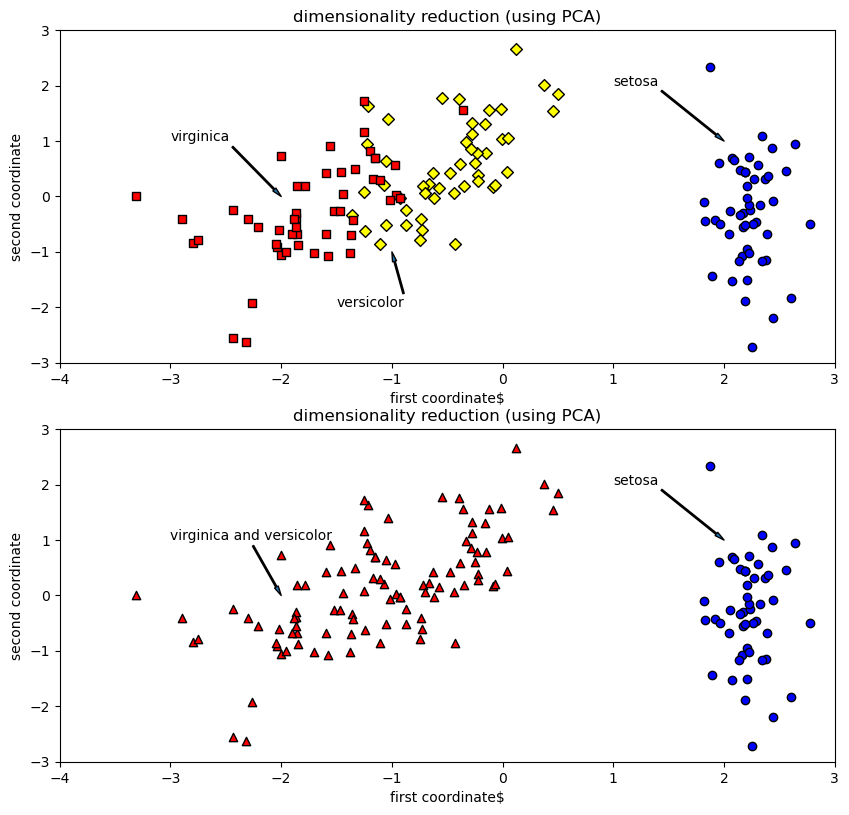

In [41]:
# figure 5 (Iris data)

f1, axs1 =  plt.subplots(2, 1, figsize= (10,9.5))

axs1[0].scatter(Z_0[:, 0], Z_0[:, 1], c = 'blue', marker = 'o', edgecolors='black')
axs1[0].scatter(Z_1[:, 0], Z_1[:, 1], c = 'yellow', marker = 'D', edgecolors='black')
axs1[0].scatter(Z_2[:, 0], Z_2[:, 1], c = 'red', marker = 's', edgecolors='black')
axs1[0].set_ylabel('second coordinate')
axs1[0].set_xlabel('first coordinate$')
axs1[0].set_title('dimensionality reduction (using PCA)')
axs1[0].set_xlim([-4, 3])
axs1[0].set_ylim([-3, 3]);
axs1[0].annotate('setosa',xy=(2, 1),xytext=(1,2),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[0].annotate('versicolor',xy=(-1,-1),xytext=(-1.5,-2),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[0].annotate('virginica',xy=(-2,0),xytext=(-3,1),arrowprops={"width":1,"headwidth":3,'headlength':7});


axs1[1].scatter(Z_0[:, 0], Z_0[:, 1], c = 'blue', marker = 'o', edgecolors='black')
axs1[1].scatter(Z_1[:, 0], Z_1[:, 1], c = 'red', marker = '^', edgecolors='black')
axs1[1].scatter(Z_2[:, 0], Z_2[:, 1], c = 'red', marker = '^', edgecolors='black')
axs1[1].set_ylabel('second coordinate')
axs1[1].set_xlabel('first coordinate$')
axs1[1].set_title('dimensionality reduction (using PCA)')
axs1[1].set_xlim([-4, 3])
axs1[1].set_ylim([-3, 3]);
axs1[1].annotate('setosa',xy=(2, 1),xytext=(1,2),arrowprops={"width":1,"headwidth":3,'headlength':7});
axs1[1].annotate('virginica and versicolor',xy=(-2,0),xytext=(-3,1),arrowprops={"width":1,"headwidth":3,'headlength':7});

#plt.savefig('fig 57.5.pdf')

**Figure 57.5** The top scatter plot shows the resulting two-dimensional feature vectors $\{h_n'\}$ for the three classes of iris flowers: setosa, virginica, and versicolor. The bottom scatter plot aggregates virginica and versicolor into a single class.

In [42]:
# We now re-label the classes: class 0 becomes +1 and the two classes 1 and 2 become -1. 
# And save the data for later use in binary classification problems.


N = np.max(A2.shape)
Az = A2
labelsz = np.ones((N,))

m = 1
for n in range(N):
    if labels2[n] != 0: # classes 1 and 2 become -1 
        labelsz[n] = -1
        
mdic = {'Az': Az, 'labelsz':labelsz}
scipy.io.savemat('./data/iris_data_feature_dimension_reduced_two_labels.mat', mdic)

## Example 57.4 (Reducing the feature space of the heart disease data)

We apply PCA to the heart disease dataset we encountered earlier in Example 54.3. The set consists of $N=297$ samples with $M=13$ attributes in each feature vector $h_n$. There are $R=4$ classes denoted by $r=0$ (no heart disease) and $r=1,2,3$ (heart disease). The 13 attributes in the feature vectors are listed in Table 54.7. We again follow the procedure outlined in Remark 57.1. We center the feature vectors $\{h_n\}$ and scale their variances to transform them into the normalized features $\{h_{n,p}\}$ according to the preprocessing steps outlined in (57.6). We subsequently perform the SVD of the $297\times 13$ matrix $H_p$ as shown by (57.39). The 13 nonzero singular values are found to be


$$
\begin{align*} &
\text{13 nonzero singular values} \\ &
= \sqrt{296} \times \{  1.7483,
  1.2653,
  1.1192,
  1.0515,
  0.9925,
  0.9337, \\ &
  0.9198,
  0.8873,
  0.8247,
  0.7506,
  0.6769,
  0.6624,
  0.5946\}
\end{align*}
$$
  


 It is seen in this example that the singular values decay slowly. Nevertheless, we  reduce the dimension of the feature vectors down to three by keeping only the three principal components, leading to

$$
U_1=\begin{bmatrix}
  -0.2683  &  0.4234 &  -0.0648\\
  -0.1174  & -0.4562 &   0.4356\\
  -0.2923  & -0.1216 &  -0.4141\\
  -0.1650  &  0.3802 &   0.3602\\
  -0.0831  &  0.4444 &  -0.2022\\
  -0.0695  &  0.2010 &   0.5345\\
  -0.1451  &  0.2660 &   0.1241\\
  0.3927   & 0.0463  &  0.2308\\
  -0.3400  & -0.1829 &  -0.1978\\
  -0.3997  & -0.0566 &   0.0692\\
  -0.3554  & -0.0660 &   0.0278\\
  -0.3050  &  0.1527 &   0.0899\\
  -0.3461  & -0.2797 &   0.2381
\end{bmatrix} 
\tag{57.47}
$$

We use these columns to compute the three-dimensional reduced feature vectors $h_n'=U_1^{\sf T} h_{n,p}$. Figure 57.6 shows scatter diagrams for these reduced vectors. 

In [43]:
#  Ao variable: heart disease original feature data with 13x1 features;
# labels 0 (no heart disease), 1, 2 and 3 (heart disease)

# Ap variable: heart disease data with features centered and their variances
# normalized; still 13x1; 4 classes  0,1,2, 3

# A2 variable: heart disease data with features normalized as above and
# reduced to 2x1 using PCA; 4 classes  0,1,2, 3

# Az variable: as in A2 except that classes 1, 2, and 3 are now blended into a 
# single class: 0 becomes +1 and 1,2, 3 become -1

data = scipy.io.loadmat('./data/heart_disease_data.mat')
N = 297 # number of data points

features = data['B'][0:N, 0:13] # each row is a feature vector with 13 attributes
labels = data['B'][0:N, 13] # entry entry is 0 = no heart disease, (1,2,3)=heart disease

Ao = features
mdic = { 'Ao': Ao, 'labels':labels}
scipy.io.savemat('./data/heart_disease_data_original.mat', mdic) # original features and 4 class labels

In [44]:
h_bar = np.mean(Ao, axis = 0)
Ac = Ao - np.ones((N, 1))*h_bar # centering of all feature vectors
s = np.std(Ao, axis = 0) # s is a row vector; contains the standard deviation for each column of A.
S = np.diag(s)
Ap = (np.matmul(np.linalg.inv(S), Ac.T)).T # rows of Ap are the normalized feature vectors
labelsp = labels # same labels 0, 1, 2, 3

mdic = { 'Ap': Ap, 'labelsp':labelsp}
scipy.io.savemat('./data/heart_disease_data_normalized.mat', mdic)

In [45]:
U, Sig, V = np.linalg.svd(Ap.T) # dimensionality reduction
M = Ao.shape[1]

sig = Sig

print("sig")
print(sig)

# reduction to DIMENSION 3
U1 = U[:, 0:3] # keep the two singular vectors corresponding to the THREE largest singular values
labels3 = labels # same labels 0, 1, 2
A3 = (np.matmul(U1.T, Ap.T)).T # reduced feature vectors in row form

print("U1")
print(U1)

mdic = { 'A3': A2, 'labels3':labels2}
scipy.io.savemat('./data/heart_disease_data_feature_dimension_3_multiple_labels.mat', mdic)

sig
[30.12915042 21.80547399 19.28819984 18.12107174 17.10467201 16.09080074
 15.85217104 15.29107392 14.21265361 12.93626665 11.66631993 11.41476598
 10.24740665]
U1
[[-0.26830601  0.42337453 -0.06481694]
 [-0.11743045 -0.45616937  0.43558604]
 [-0.29230884 -0.12159909 -0.41414738]
 [-0.16503041  0.38020051  0.36024241]
 [-0.08306079  0.44437564 -0.20222608]
 [-0.06950626  0.20101903  0.53454799]
 [-0.14508213  0.26595107  0.12413576]
 [ 0.39268689  0.04629158  0.23081198]
 [-0.34000946 -0.18288679 -0.19778027]
 [-0.39972195 -0.05664395  0.06917473]
 [-0.35543952 -0.06597668  0.02782407]
 [-0.30504779  0.15268698  0.08986429]
 [-0.34609966 -0.27973408  0.2381138 ]]


In [46]:
N_0 = 0 # class 0
N_1 = 0 # class 1
N_2 = 0 # class 2
N_3 = 0 # class 3
Z_0a = np.array([])
Z_1a = np.array([])
Z_2a = np.array([])
Z_3a = np.array([])

for n in range(N):
    if labels3[n] == 0:
        N_0 = N_0 + 1
        if Z_0a.shape[0] == 0:
            Z_0a = np.append(Z_0a, A3[n, :]) # collect reduced features for class 0 into Z_0
        else:    
            Z_0a = np.vstack((Z_0a, A3[n, :]))   
    
    elif labels3[n] == 1:
        N_1 = N_1 + 1
        if Z_1a.shape[0] == 0:
            Z_1a = np.append(Z_1a, A3[n, :])  
        else:    
            Z_1a = np.vstack((Z_1a, A3[n, :]))
            
    elif labels3[n] == 2:
        N_2 = N_2 + 1
        if Z_2a.shape[0] == 0:
            Z_2a = np.append(Z_2a, A3[n, :])  
        else:    
            Z_2a = np.vstack((Z_2a, A3[n, :]))
    
    elif labels3[n] == 3:
        N_3 = N_3 + 1
        if Z_3a.shape[0] == 0:
            Z_3a = np.append(Z_3a, A3[n, :])  
        else:    
            Z_3a = np.vstack((Z_3a, A3[n, :]))
            

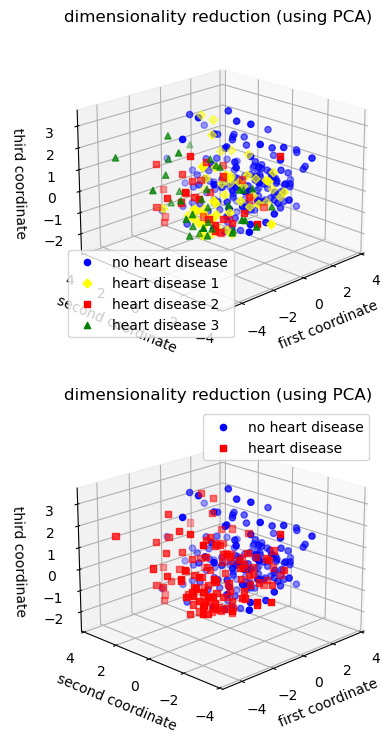

In [47]:
# figure 6 (heart disease dataset)

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.scatter(Z_0a[:, 0], Z_0a[:, 1], Z_0a[:, 2].reshape(1, -1), marker='o', c = 'blue')
ax.scatter(Z_1a[:, 0], Z_1a[:, 1], Z_1a[:, 2].reshape(1, -1), marker='D', c = 'yellow')
ax.scatter(Z_2a[:, 0], Z_2a[:, 1], Z_2a[:, 2].reshape(1, -1), marker='s', c = 'red')
ax.scatter(Z_3a[:, 0], Z_3a[:, 1], Z_3a[:, 2].reshape(1, -1), marker='^', c = 'green')

ax.set_xlabel('first coordinate')
ax.set_ylabel('second coordinate')
ax.set_zlabel('third coordinate')
ax.set_title('dimensionality reduction (using PCA)')
ax.view_init(20, 225)
ax.legend(['no heart disease','heart disease 1','heart disease 2','heart disease 3']);

ax.set_xlim([-5, 4])
ax.set_ylim([-4, 4]);


ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.scatter(Z_0a[:, 0], Z_0a[:, 1], Z_0a[:, 2].reshape(1, -1), marker='o', c = 'blue')
ax.scatter(Z_1a[:, 0], Z_1a[:, 1], Z_1a[:, 2].reshape(1, -1), marker='s', c = 'red')
ax.scatter(Z_2a[:, 0], Z_2a[:, 1], Z_2a[:, 2].reshape(1, -1), marker='s', c = 'red')
ax.scatter(Z_3a[:, 0], Z_3a[:, 1], Z_3a[:, 2].reshape(1, -1), marker='s', c = 'red')

ax.set_xlabel('first coordinate')
ax.set_ylabel('second coordinate')
ax.set_zlabel('third coordinate')
ax.set_title('dimensionality reduction (using PCA)')
ax.view_init(20, 225)
ax.legend(['no heart disease','heart disease']);

ax.set_xlim([-5, 4])
ax.set_ylim([-4, 4]);

#plt.savefig('fig 57.6.pdf')

**Figure 57.6** The top scatter plot shows the resulting three-dimensional feature vectors $\{h_n'\}$ for four classes of heart disease conditions. The bottom scatter aggregates all data points into two classes depending on the presence or absence of a heart disease condition. The heart disease data is derived from the processed Cleveland dataset from the site https://archive.ics.uci.edu/ml/datasets/heart+Disease.

In [48]:
# We now re-label the classes: class 0 becomes +1 and the three classes 1, 2 and 3 become -1. 
# And save the data for later use in binary classification problems.


N = np.max(A3.shape)
A3z = A3
labelsz = np.ones((N,))

m = 1
for n in range(N):
    if labels3[n] != 0:
        labelsz[n] = -1
        
mdic = {'A3z': A3z, 'labelsz':labelsz}
scipy.io.savemat('./data/heart_disease_data_feature_dimension_3_two_labels.mat', mdic)